In [ ]:
#Arbre de decision with continous data 

Columns: ['FAMD_1', 'FAMD_2', 'FAMD_3', 'FAMD_4', 'Y']
Shape: (25782, 5)
Best parameters: {'max_depth': 7, 'min_samples_leaf': 5, 'min_samples_split': 10}
Accuracy: 0.6874151638549544
Precision: 0.7236686784045755
Recall: 0.6822178210073397
F1 Score: 0.6702991954001472
  feature  importance
3  FAMD_4    0.368380
0  FAMD_1    0.243636
1  FAMD_2    0.198276
2  FAMD_3    0.189708


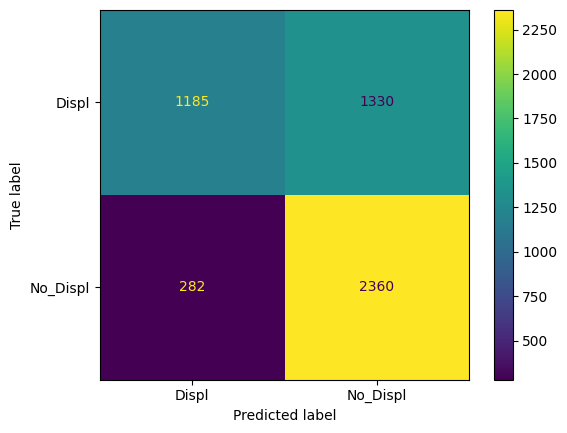

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay

# 1. Load dataset  
data_norm = pd.read_csv(
    "/kaggle/input/productdisplaypredistion/data_famd.csv",
    sep=';'
)

print("Columns:", data_norm.columns.tolist())
print("Shape:", data_norm.shape)

# 2. Split features و target
X = data_norm.drop('Y', axis=1)
y = data_norm['Y']

# 3. Train / Test split
X_train, X_test, Y_train, Y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. Tuning بـ GridSearchCV
param_grid = {
    "max_depth": [3, 4, 5, 6, 7],
    "min_samples_split": [5, 10, 20],
    "min_samples_leaf": [2, 5, 10]
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(criterion='gini'),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy'
)

grid_search.fit(X_train, Y_train)

print("Best parameters:", grid_search.best_params_)

# 5. Création
dt = DecisionTreeClassifier(
    max_depth=grid_search.best_params_["max_depth"],
    min_samples_split=grid_search.best_params_["min_samples_split"],
    min_samples_leaf=grid_search.best_params_["min_samples_leaf"]
)

# 6. Training
dt.fit(X_train, Y_train)

# 7. Prediction
Y_pred = dt.predict(X_test)

# 8. Evaluation
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred, average='macro')
rec = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print("Accuracy:", acc)
print("Precision:", prec)
print("Recall:", rec)
print("F1 Score:", f1)

# 9. Confusion Matrix 
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)

# 10. Importance des variables
feat_imp = pd.DataFrame({
    "feature": X.columns,
    "importance": dt.feature_importances_
}).sort_values("importance", ascending=False)

print(feat_imp)


In [ ]:
#Arbre de decision with categorical data 

Columns: ['X1_cat', 'X2_cat', 'X3_cat', 'X4_cat', 'X6_cat', 'X5', 'X7', 'Y']
=== Classification Report ===
              precision    recall  f1-score   support

       Displ       0.87      0.67      0.76      2515
    No_Displ       0.74      0.90      0.82      2642

    accuracy                           0.79      5157
   macro avg       0.81      0.79      0.79      5157
weighted avg       0.81      0.79      0.79      5157

=== Metrics ===
Accuracy : 0.7912
Precision: 0.8067
Recall   : 0.7883
F1 Score : 0.7873


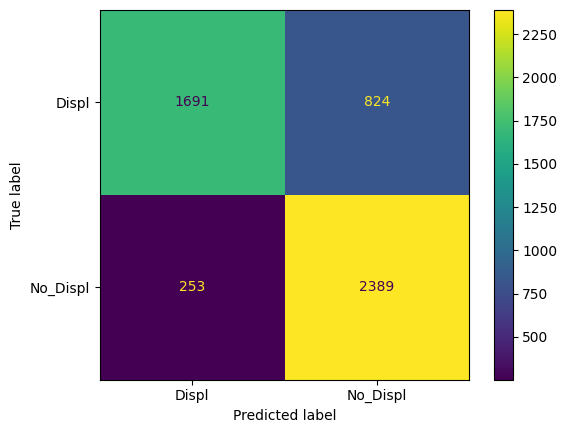

=== Feature Importance ===
             feature  importance
84           X7_Feat    0.683812
43     X4_cat_bin_17    0.122529
68         X5_CASINO    0.063456
13      X2_cat_bin_6    0.035427
49      X4_cat_bin_7    0.021233
..               ...         ...
71       X5_FRANPRIX    0.000000
73        X5_HYPER U    0.000000
82  X5_SIMPLY MARKET    0.000000
83        X5_SUPER U    0.000000
85        X7_No_Feat    0.000000

[86 rows x 2 columns]


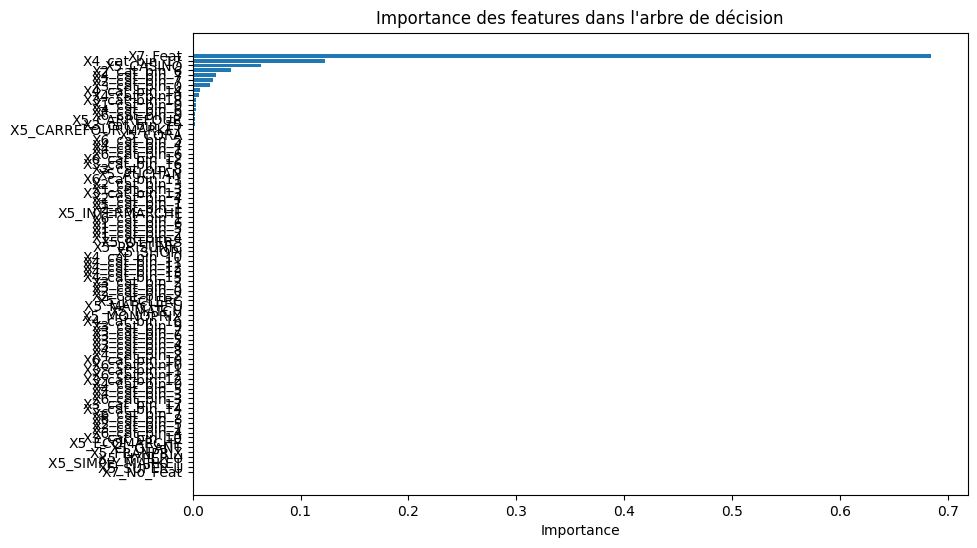

In [5]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Charger la donnée MDLPC
df = pd.read_csv("/kaggle/input/productdisplaypredistion/data_categorical_mdlpc.csv", sep=';')

print("Columns:", df.columns.tolist())

# 2. Features / Target
X = df.drop('Y', axis=1)
y = df['Y']

# 3. Encodage MDLP → One Hot
X_enc = pd.get_dummies(X)

# 4. Split Train/Test
X_train, X_test, y_train, y_test = train_test_split(
    X_enc, y, test_size=0.2, random_state=42
)

# 5. Création de l'arbre de décision
dt = DecisionTreeClassifier(
    criterion='gini',
    max_depth=6,
    min_samples_split=10,
    min_samples_leaf=5,
    random_state=42
)

# 6. Entraînement
dt.fit(X_train, y_train)

# 7. Prédiction
y_pred = dt.predict(X_test)

# 8. Évaluation
print("=== Classification Report ===")
print(classification_report(y_test, y_pred))

acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("=== Metrics ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# 9. Matrice de confusion
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# 10. Importance des variables
feat_imp = pd.DataFrame({
    "feature": X_enc.columns,  # Utiliser X_enc, pas X
    "importance": dt.feature_importances_
}).sort_values("importance", ascending=False)

print("=== Feature Importance ===")
print(feat_imp)

# Optionnel : Plot des features importantes
plt.figure(figsize=(10,6))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.xlabel("Importance")
plt.title("Importance des features dans l'arbre de décision")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#random forest with continous data 

=== Evaluation ===
Accuracy : 0.7912
Precision: 0.8067
Recall   : 0.7883
F1 Score : 0.7873


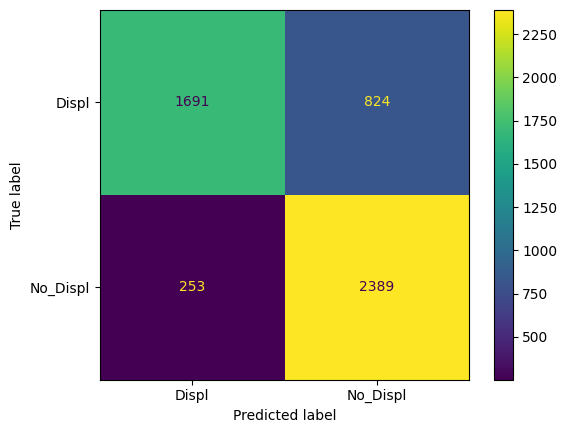

=== Feature Importance ===
  feature  importance
3  FAMD_4    0.273887
1  FAMD_2    0.244864
0  FAMD_1    0.242914
2  FAMD_3    0.238336


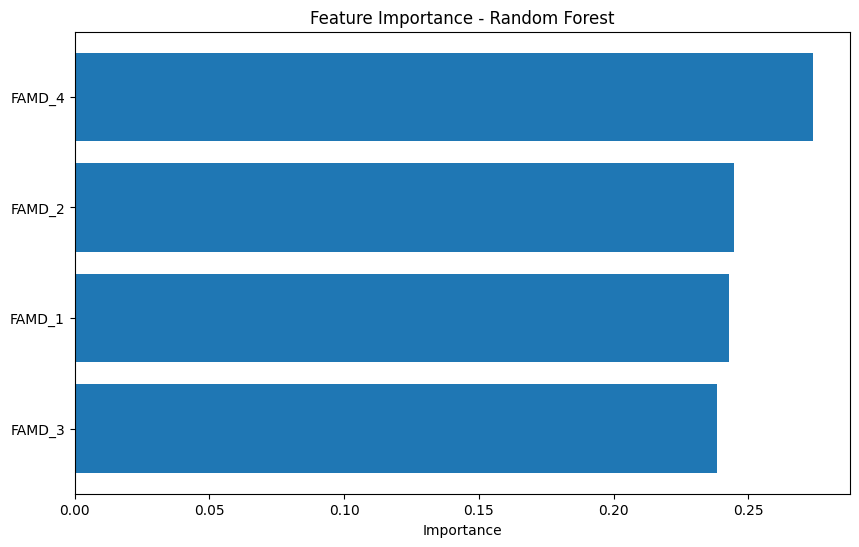

In [8]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the dataset
data_norm = pd.read_csv("/kaggle/input/productdisplaypredistion/data_famd.csv", sep=';')

# 2. Split the data into features (X) and target (Y)
X = data_norm.drop('Y', axis=1)
Y = data_norm['Y']  # <-- corrected

# 3. Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size=0.2, random_state=42
)

# 4. Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# 5. Fit the model on the training data
rf.fit(X_train, Y_train)

# 6. Make predictions on the test data
Y_pred = rf.predict(X_test)


# 8. Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("=== Evaluation ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# 9. Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# 10. Feature importance
feat_imp = pd.DataFrame({
    "feature": X.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("=== Feature Importance ===")
print(feat_imp)

# Optional: plot feature importance
plt.figure(figsize=(10,6))
plt.barh(feat_imp['feature'], feat_imp['importance'])
plt.xlabel("Importance")
plt.title("Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
#random forest with Categorical data 

Columns: ['X1_cat', 'X2_cat', 'X3_cat', 'X4_cat', 'X6_cat', 'X5', 'X7', 'Y']
Shape: (25782, 8)
=== Evaluation ===
Accuracy : 0.7912
Precision: 0.8067
Recall   : 0.7883
F1 Score : 0.7873


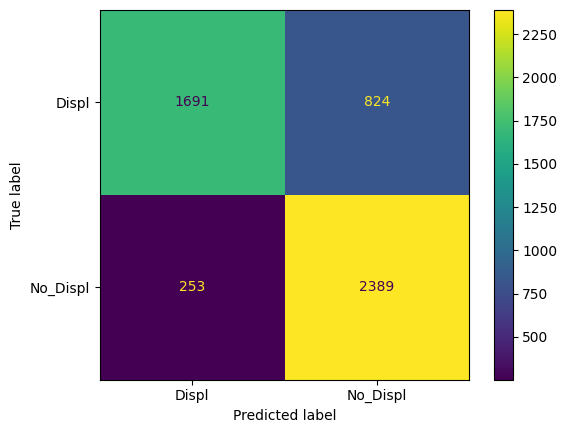

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the categorical dataset
data_cat = pd.read_csv("/kaggle/input/productdisplaypredistion/data_categorical_mdlpc.csv", sep=';')

print("Columns:", data_cat.columns.tolist())
print("Shape:", data_cat.shape)

# 2. Split features and target
X = data_cat.drop('Y', axis=1)
Y = data_cat['Y']

# 3. Encode categorical variables → One-Hot Encoding
X_enc = pd.get_dummies(X)

# 4. Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_enc, Y, test_size=0.2, random_state=42
)

# 5. Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# 6. Fit the model
rf.fit(X_train, Y_train)

# 7. Make predictions
Y_pred = rf.predict(X_test)

# 8. Evaluation
acc = accuracy_score(y_test, y_pred)
prec = precision_score(y_test, y_pred, average='macro')
rec = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

print("=== Evaluation ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")

# 9. Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()




In [ ]:
# Arbre decision with data original

Columns: ['X1_cat', 'X2_cat', 'X3_cat', 'X4_cat', 'X6_cat', 'X5', 'X7', 'Y']
Shape: (25782, 8)
=== Evaluation ===
Accuracy : 0.8069
Precision: 0.8073
Recall   : 0.8063
F1 Score : 0.8065

Classification Report:
               precision    recall  f1-score   support

       Displ       0.81      0.78      0.80      2515
    No_Displ       0.80      0.83      0.82      2642

    accuracy                           0.81      5157
   macro avg       0.81      0.81      0.81      5157
weighted avg       0.81      0.81      0.81      5157



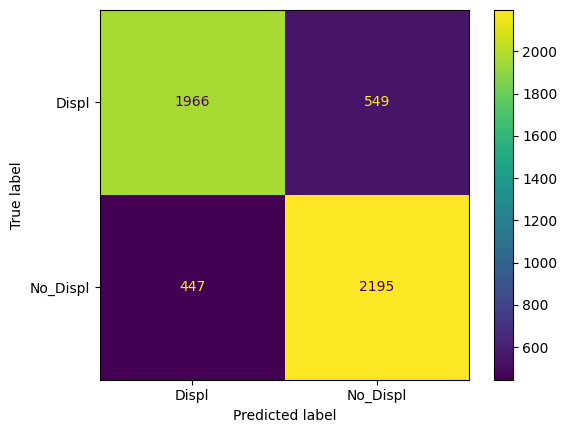

=== Feature Importance ===
          feature  importance
85     X7_No_Feat    0.143261
84        X7_Feat    0.112643
43  X4_cat_bin_17    0.057113
68      X5_CASINO    0.026969
0    X1_cat_bin_0    0.025362
..            ...         ...
80    X5_PRISUNIC    0.001012
26   X3_cat_bin_2    0.000930
71    X5_FRANPRIX    0.000637
79      X5_OTHERS    0.000571
81       X5_SHOPI    0.000316

[86 rows x 2 columns]


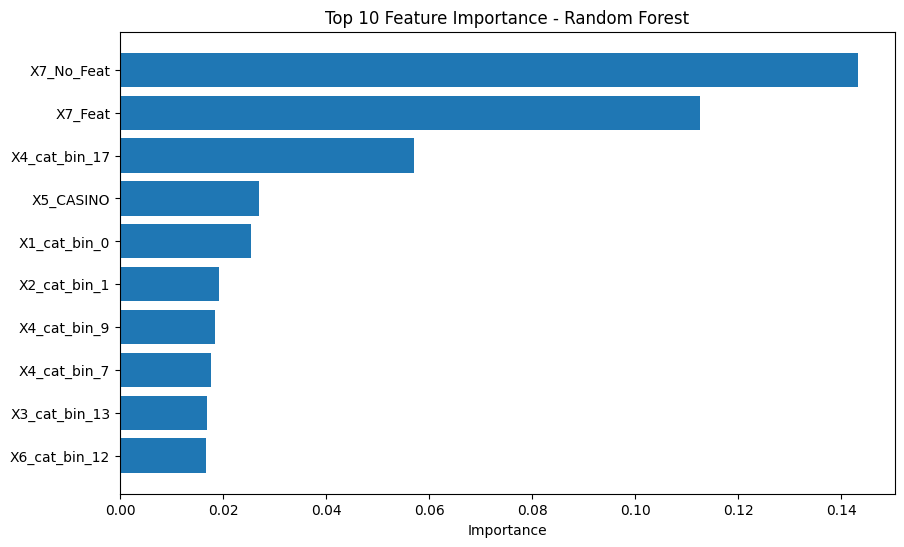

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the categorical dataset
data_cat = pd.read_csv("/kaggle/input/productdisplaypredistion/data_categorical_mdlpc.csv", sep=';')

print("Columns:", data_cat.columns.tolist())
print("Shape:", data_cat.shape)

# 2. Split features and target
X = data_cat.drop('Y', axis=1)
Y = data_cat['Y']

# 3. Encode categorical variables → One-Hot Encoding
X_enc = pd.get_dummies(X)

# 4. Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_enc, Y, test_size=0.2, random_state=42
)

# 5. Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# 6. Fit the model
rf.fit(X_train, Y_train)

# 7. Make predictions
Y_pred = rf.predict(X_test)

# 8. Evaluation
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred, average='macro')
rec = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print("=== Evaluation ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# 9. Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()

# 10. Feature importance
feat_imp = pd.DataFrame({
    "feature": X_enc.columns,  # <-- use X_enc here
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("=== Feature Importance ===")
print(feat_imp)

# Optional: plot top 10 most important features
plt.figure(figsize=(10,6))
plt.barh(feat_imp['feature'][:10], feat_imp['importance'][:10])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
# random forest with data original without GridSearchCV

Columns: ['Y', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7']
Shape: (25783, 8)
=== Evaluation ===
Accuracy : 0.8551
Precision: 0.8566
Recall   : 0.8548
F1 Score : 0.8549

Classification Report:
               precision    recall  f1-score   support

       Displ       0.88      0.82      0.85      2551
    No_Displ       0.84      0.89      0.86      2606

    accuracy                           0.86      5157
   macro avg       0.86      0.85      0.85      5157
weighted avg       0.86      0.86      0.85      5157



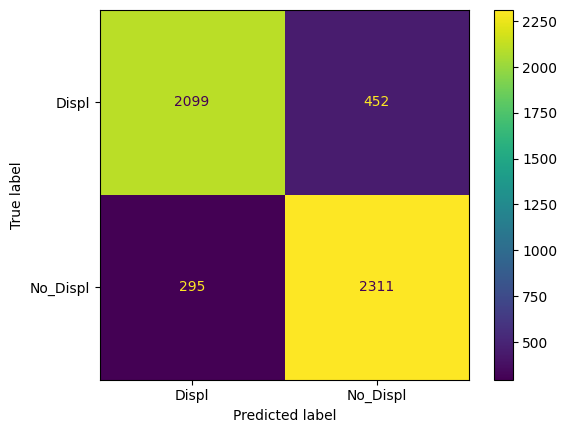

=== Feature Importance ===
          feature  importance
11341     X7_Feat    0.097451
11343  X7_No_Feat    0.082609
9734    X5_CASINO    0.011325
0            X1_1    0.010463
9685        X4_32    0.008394
...           ...         ...
10357    X6_24940    0.000000
1421    X2_129.04    0.000000
1415    X2_128.97    0.000000
1414    X2_128.88    0.000000
2458    X2_1690.1    0.000000

[11344 rows x 2 columns]


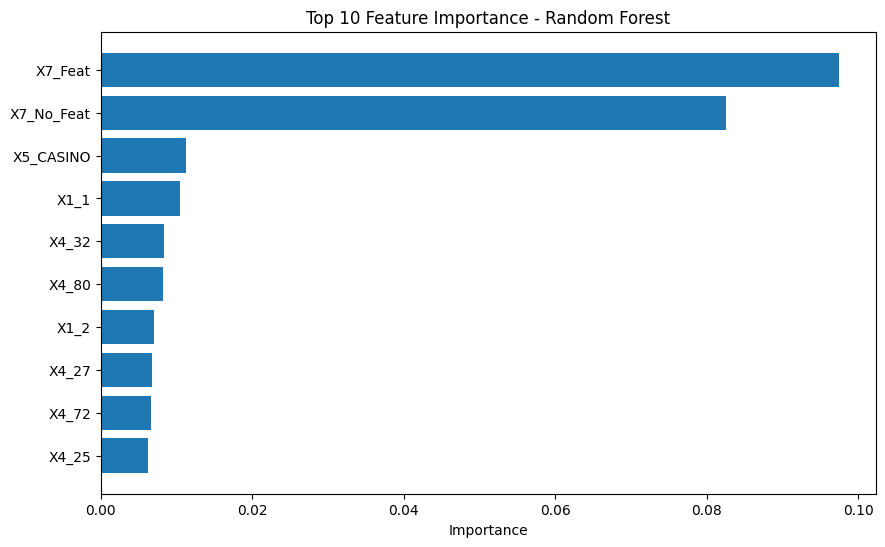

In [14]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Load the categorical dataset
data_cat = pd.read_csv("/kaggle/input/productdisplaypredistion/new_Base_CDM_balanced_V2.csv", sep=';')

print("Columns:", data_cat.columns.tolist())
print("Shape:", data_cat.shape)

# 2. Split features and target
X = data_cat.drop('Y', axis=1)
Y = data_cat['Y']

# 3. Encode categorical variables → One-Hot Encoding
X_enc = pd.get_dummies(X)

# 4. Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(
    X_enc, Y, test_size=0.2, random_state=42
)

# 5. Instantiate the Random Forest model
rf = RandomForestClassifier(random_state=42)

# 6. Fit the model
rf.fit(X_train, Y_train)

# 7. Make predictions
Y_pred = rf.predict(X_test)

# 8. Evaluation
acc = accuracy_score(Y_test, Y_pred)
prec = precision_score(Y_test, Y_pred, average='macro')
rec = recall_score(Y_test, Y_pred, average='macro')
f1 = f1_score(Y_test, Y_pred, average='macro')

print("=== Evaluation ===")
print(f"Accuracy : {acc:.4f}")
print(f"Precision: {prec:.4f}")
print(f"Recall   : {rec:.4f}")
print(f"F1 Score : {f1:.4f}")
print("\nClassification Report:\n", classification_report(Y_test, Y_pred))

# 9. Confusion Matrix
ConfusionMatrixDisplay.from_predictions(Y_test, Y_pred)
plt.show()

# 10. Feature Importance
feat_imp = pd.DataFrame({
    "feature": X_enc.columns,
    "importance": rf.feature_importances_
}).sort_values("importance", ascending=False)

print("=== Feature Importance ===")
print(feat_imp)

# Optional: plot top 10 features
plt.figure(figsize=(10,6))
plt.barh(feat_imp['feature'][:10], feat_imp['importance'][:10])
plt.xlabel("Importance")
plt.title("Top 10 Feature Importance - Random Forest")
plt.gca().invert_yaxis()
plt.show()
